Accessing Remote Resources
==========================

Web pages and data
------------------

I have mentioned before how one can access data files on your hard drive, but Python also allows you to access remote data, for example on the internet. The easiest way to do this is to use the [requests](https://pypi.python.org/pypi/requests) module. To start off, you just can get the URL:

In [1]:
import requests

response = requests.get('http://xkcd.com/353/')

``response`` holds the response now. You can access the content as text via the text-property:

In [2]:
print(response.text[:1000])  # only print the first 1000 characters

<?xml version="1.0" encoding="UTF-8" ?>
<!DOCTYPE html PUBLIC "-//W3C//DTD XHTML 1.1//EN"
    "http://www.w3.org/TR/xhtml11/DTD/xhtml11.dtd">
<html version="-//W3C//DTD XHTML 1.1//EN" xmlns="http://www.w3.org/1999/xhtml" xml:lang="en">
<head>
<link rel="stylesheet" type="text/css" href="/s/b0dcca.css" title="Default"/>
<title>xkcd: Python</title>
<meta http-equiv="X-UA-Compatible" content="IE=edge"/>
<link rel="shortcut icon" href="/s/919f27.ico" type="image/x-icon"/>
<link rel="icon" href="/s/919f27.ico" type="image/x-icon"/>
<link rel="alternate" type="application/atom+xml" title="Atom 1.0" href="/atom.xml"/>
<link rel="alternate" type="application/rss+xml" title="RSS 2.0" href="/rss.xml"/>
<script>
(function(i,s,o,g,r,a,m){i['GoogleAnalyticsObject']=r;i[r]=i[r]||function(){
(i[r].q=i[r].q||[]).push(arguments)},i[r].l=1*new Date();a=s.createElement(o),
m=s.getElementsByTagName(o)[0];a.async=1;a.src=g;m.parentNode.insertBefore(a,m)
})(window,document,'script','//www.google-analytics.c

You can either just use this information directly, or in some cases you might want to write it to a file. Let's download one of the full resolution files for the Ice coverage data from Problem Set 9:

In [3]:
r2 = requests.get('http://mpia.de/~robitaille/share/ice_data/20060313.npy')

In [4]:
r2.text[:200]

"\x93NUMPY\x01\x00F\x00{'descr': '>f4', 'fortran_order': False, 'shape': (1100, 1000), }    \n\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00@å ;ÿÿÿÿAÂPRB;a\x9dÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿ"

However, this doesn't seem to be actual <i>text</i>. Instead, its a binary format. The binary data of the response can be accessed via

In [5]:
r2.content[:200]

b"\x93NUMPY\x01\x00F\x00{'descr': '>f4', 'fortran_order': False, 'shape': (1100, 1000), }    \n\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00@\xe5 ;\xff\xff\xff\xffA\xc2PRB;a\x9d\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff"

Note the little ``b`` at the beginning indicating a binary byte-string.

Now we can open a new (binary) file and download the data to the file.

In [6]:
f = open('20060313.npy', 'wb')
f.write(r2.content)
f.close()

Let's now load and plot the data:

In [7]:
import numpy as np
data = np.load('20060313.npy')

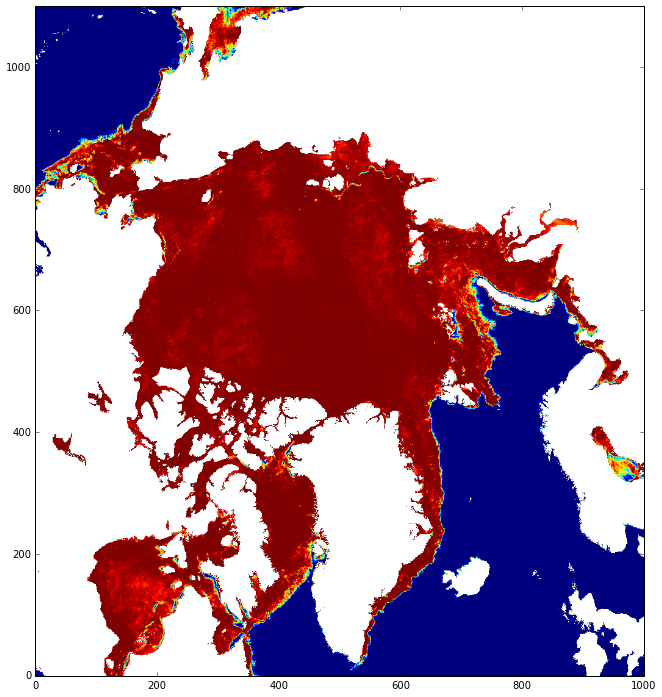

In [8]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.figure(figsize=(12,12))
plt.imshow(data, origin='lower')

APIs
----

Imagine that you want to access some data online. In some cases, you will need to download a web page and search through the HTML to extract what you want. For example:

In [9]:
r = requests.get('http://www.wetteronline.de/wetter/heidelberg')

In [10]:
r.text[:1000]

'<!DOCTYPE html>\n<html>\n<head>\n <title>Wetter Heidelberg - WetterOnline</title>\n <meta http-equiv="X-UA-Compatible" content="IE=edge" />\n <meta name="description" content="Das Wetter in Heidelberg - mit aktueller Wettervorhersage, Wetterradar, Unwetterwarnungen und mehr von wetteronline.de" />\n <meta name="keywords" content="Wetter Heidelberg, Baden-Württemberg, Deutschland, Wetter , Wettervorhersage, Regenradar, Unwetterwarnung, 14 Tage Wetter, 16 Tage Wetter" />\n <meta http-equiv="content-type" content="text/html; charset=utf-8" />\n <meta http-equiv="content-language" content="de-DE" />\n <meta name="skype_toolbar" content="skype_toolbar_parser_compatible" />\n <meta property="fb:admins" content="100001020190994" />\n <meta property="og:title" content="Wetter Heidelberg - WetterOnline">\n <meta property="og:type" content="article">\n <meta property="og:image" content="http://st.wetteronline.de/img/logo/wetteronline_facebook_logo.jpg?v=">\n \n <meta property="og:url" content="

This is not ideal because it is messy, and also slow if all you want are a couple of values. A number of websites now offer an "Application programming interface" (or API) which is basically a way of accessing data is a machine-readable way. Let's take a look at http://openweathermap.org/ for example, which has an API: http://openweathermap.org/API. To access the weather for Heidelberg, you can do:

In [11]:
r = requests.get('http://api.openweathermap.org/data/2.5/weather?q=Heidelberg,Germany')

In [12]:
r.text

'{"coord":{"lon":8.69,"lat":49.41},"sys":{"type":1,"id":4897,"message":0.019,"country":"DE","sunrise":1410930303,"sunset":1410975246},"weather":[{"id":800,"main":"Clear","description":"Sky is Clear","icon":"01d"}],"base":"cmc stations","main":{"temp":297.81,"pressure":1013,"humidity":60,"temp_min":294.65,"temp_max":303.71},"wind":{"speed":3.1,"deg":90},"clouds":{"all":0},"dt":1410953109,"id":2907911,"name":"Heidelberg","cod":200}\n'

This is much shorter, but still not ideal for reading into Python as-is. The format above is called JSON, and Python includes a library to easily read in this data:

In [13]:
import json
data = json.loads(r.text)

In [14]:
data

{'id': 2907911,
 'sys': {'type': 1,
  'id': 4897,
  'sunset': 1410975246,
  'message': 0.019,
  'sunrise': 1410930303,
  'country': 'DE'},
 'base': 'cmc stations',
 'main': {'humidity': 60,
  'temp_max': 303.71,
  'pressure': 1013,
  'temp': 297.81,
  'temp_min': 294.65},
 'weather': [{'id': 800,
   'description': 'Sky is Clear',
   'main': 'Clear',
   'icon': '01d'}],
 'cod': 200,
 'name': 'Heidelberg',
 'coord': {'lat': 49.41, 'lon': 8.69},
 'wind': {'speed': 3.1, 'deg': 90},
 'clouds': {'all': 0},
 'dt': 1410953109}

You should now be able to do:

In [15]:
data[u'main'][u'temp']

297.81

It looks like the temperature is in K!

## Exercise

You can find over 2000 tiles of the Arctic ice coverage data using the URL with the format:

    http://mpia.de/~robitaille/share/ice_data/YYYYMMDD.npy
    
Write a Python function that takes three arguments - the year, month, and day, as integers, and returns a Numpy array. If the map does not exist, try and return ``None`` instead of having an error:

In [16]:

# your solution here


Try using the function to make a plot, as shown above:

In [17]:

# your solution here
